In [ ]:
# if package not installed yet
#install.packages("plot3D")

In [1]:
library(plot3D)

In [2]:
theta = c(pi/15, -pi/9, -pi/20)
Sigma = diag(c(3, 1, 0.5)) # scale x, then y, then z

# Rotation about x axis
Rx = t(matrix(c(1, 0, 0, 0, cos(theta[1]), -sin(theta[1]), 0, sin(theta[1]), cos(theta[1])), 3, 3))

# Rotation about y axis
Ry = t(matrix(c(cos(theta[2]), 0, sin(theta[2]), 0, 1, 0, -sin(theta[1]), 0, cos(theta[1])), 3, 3))

# Rotation about z axis
Rz = t(matrix( c(cos(theta[3]), -sin(theta[3]), 0, sin(theta[3]), cos(theta[3]), 0, 0, 0, 1), 3, 3))

# Rotate and scale
X = Rz %*% Ry %*% Rx %*% Sigma

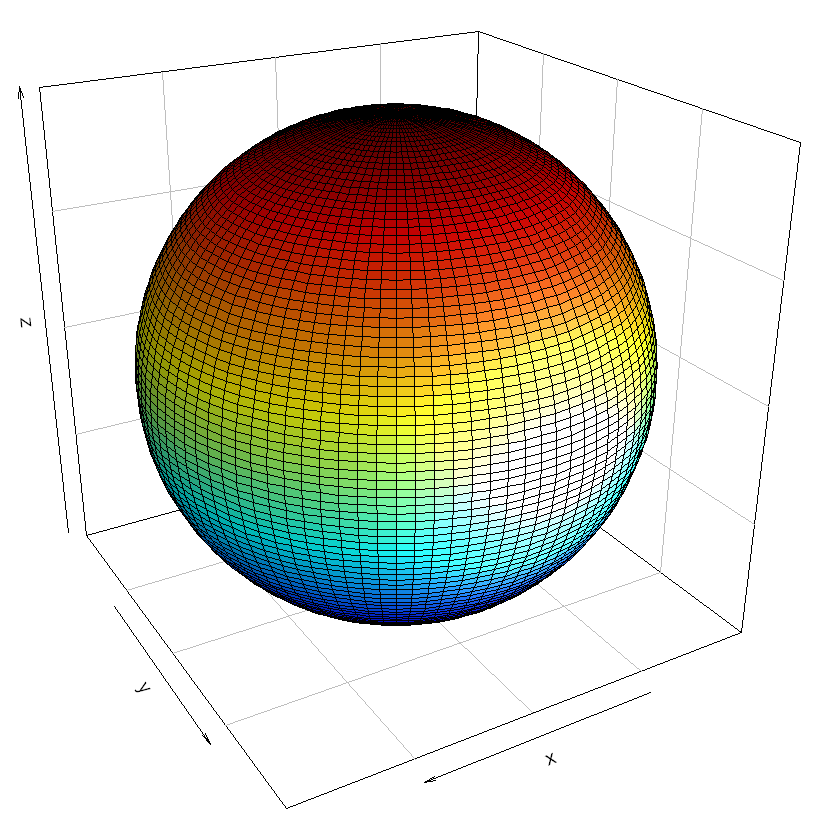

In [3]:
M  <- mesh(seq(-pi, pi, length.out = 100), 
           seq(0,   pi, length.out = 100))

u  <- M$x
v  <- M$y

x <- cos(u)*sin(v)
y <- sin(u)*sin(v)
z <- cos(v)

Col <- "red"
par(mfrow = c(1, 1), mar=c(0, 0, 0, 0))
surf3D(x, y, z,  colvar=z, phi=25, theta=150, bty = "b2",lighting = TRUE, ltheta = 5, colkey = FALSE, border = "black", d=2)

In [4]:
xR = matrix(0, dim(x)[1], dim(x)[2])
yR = matrix(0, dim(y)[1], dim(y)[2])
zR = matrix(0, dim(z)[1], dim(z)[2])

In [5]:
for (i in 1:dim(x)[1]) {
    for (j in 1:dim(x)[2]) {
        vec <- c(x[i,j], y[i,j], z[i,j])
        vecR = X %*% vec;
        xR[i,j] = vecR[1];
        yR[i,j] = vecR[2];
        zR[i,j] = vecR[3];        
        
    }
}

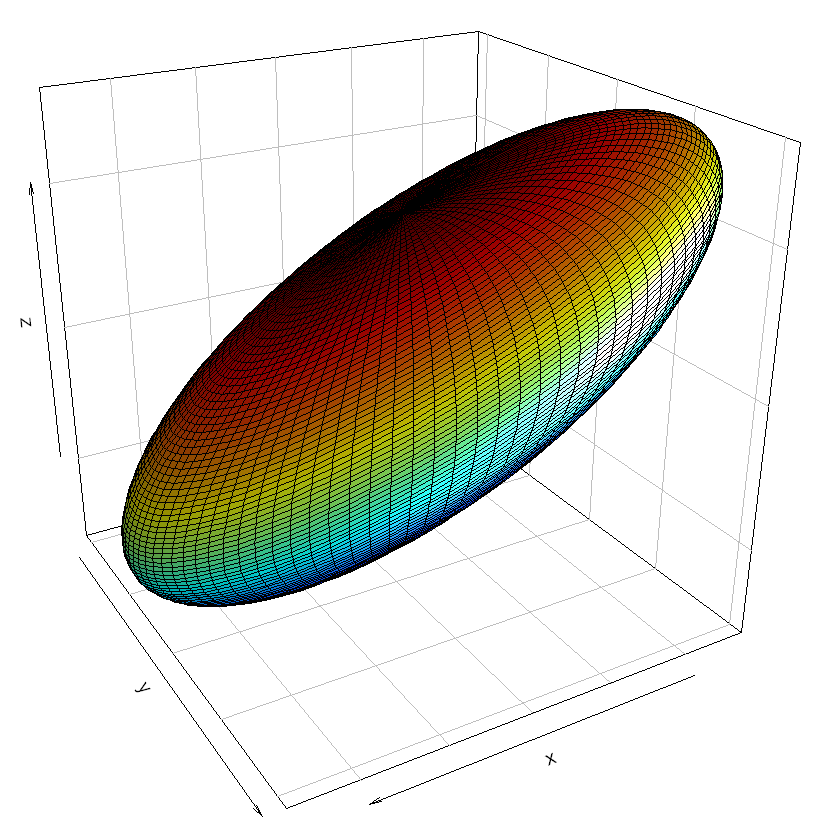

In [7]:
Col <- "red"
par(mfrow = c(1, 1), mar=c(0, 0, 0, 0))
surf3D(xR, yR, zR,  colvar=z, phi=25, theta=150, bty = "b2", lighting = TRUE, ltheta = 5, colkey = FALSE, border = "black", d=2)